In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
m0 = -1.143
m1 = -0.714
alpha = 15.6
beta = 28
h = lambda x: m1 * x + ( (m0 - m1) * (abs(x + 1) - abs(x - 1)) / 2)

In [3]:
def derivative(t, v, d):
    dxdt = alpha * (v[1] - v[0] - h(v[0]))
    dydt = v[0] - v[1] + v[2]
    dzdt = - beta * v[1]
    return [dxdt, dydt, dzdt]

In [4]:
v0, t0 = [0.7, 0.0, 0.0], 0.0

r = ode(derivative).set_integrator('dopri5')
r.set_initial_value(v0, t0).set_f_params(1)

t_max = 50
dt = 0.02

num_steps = int(t_max / dt) + 2
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)

x[0], y[0], z[0] = v0

idx = 1
while r.successful() and r.t < t_max:
    r.integrate(r.t+dt)
    x[idx], y[idx], z[idx] = r.y[0:3]
    idx += 1

Text(0, 0.5, 'z')

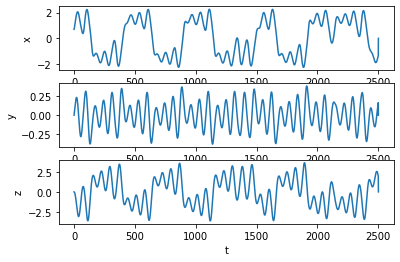

In [5]:
plt.subplot(3, 1, 1)
plt.plot(x)
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(3, 1, 2)
plt.plot(y)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(3, 1, 3)
plt.plot(z)
plt.xlabel('t')
plt.ylabel('z')

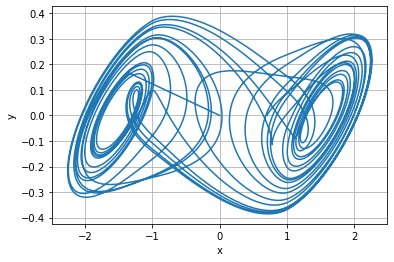

In [6]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

<IPython.core.display.Javascript object>


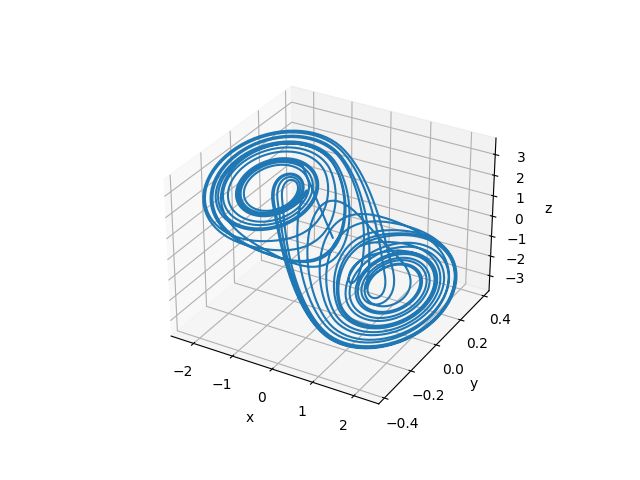

In [7]:
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')     
ax.yaxis.set_label_text('y')
ax.zaxis.set_label_text('z')
plt.grid()